## Purpose: To practice the Fourier Transform on images 

*Step 1: Importing necessary packages*

In [3]:
from PIL import Image, ImageFilter, ImageEnhance
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import scipy
from scipy.ndimage import gaussian_filter
import MultiresHist as mult

In [4]:
#List of the number of bins you want for the histograms
bin_list = [3]

#List for the gaussian blur sigma variable
gauss_blur_list = [0,1] #Funciton only works for two gauss blurs currently

*Step 1: Importing the image and saving it as a variable without converting to greyscale*

In [5]:
im_color =  Image.open("/Users/HawleyHelm/Desktop/P35_LPS_ipsi_40x_zstack_cells_MaxIP.png")

*Step 3: Splitting the channels into R, G, B Values*

In [6]:
r,g,b = im_color.split()

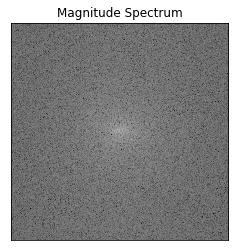

In [7]:
f_green = np.fft.fft2(g)
fshift_green = np.fft.fftshift(f_green)
m_spec_green = np.log(np.abs(fshift_green))

plt.imshow(m_spec_green, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

## So it works but can we increase contrast to see if there is patterning?

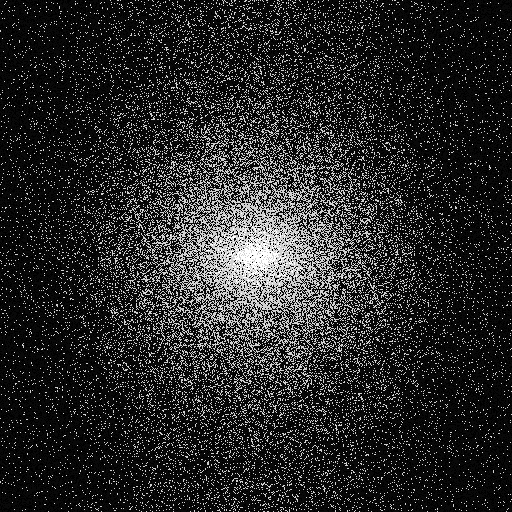

In [8]:
img = Image.fromarray(m_spec_green)
img = img.convert("L")
enhancer = ImageEnhance.Contrast(img)
enhanced_im_green = enhancer.enhance(200.0)

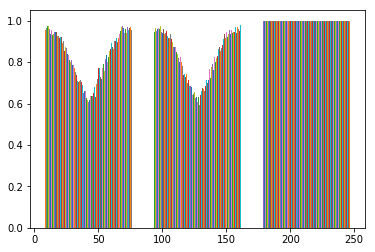

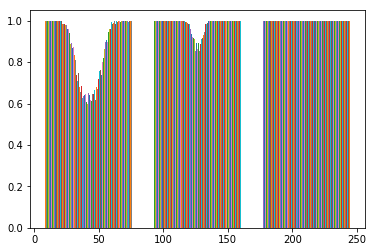

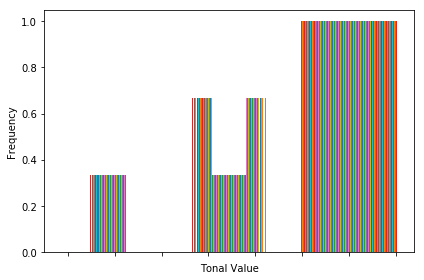

In [9]:
mult.Multi_res_hist_full(enhanced_im_green, bin_list, gauss_blur_list)